<a href="https://colab.research.google.com/github/girdharriya/Data-Analytics-Project/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ASSIGNMENT 3 - CLUSTERING**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Installing the required libraries
import pandas as pd, numpy as np # For Data Manipulation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.preprocessing import OneHotEncoder # For Creating Dummy Variables of Categorical Data [Nominal]
from sklearn.impute import SimpleImputer, KNNImputer # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # For Rescaling Data
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets
# Install Library : pydataset
!pip install pydataset
# Required Libraries
from pydataset import data # For Datasets
import pandas as pd, numpy as np # For Data Manipulation
import matplotlib.pyplot as plt, seaborn as sns # For Data Visualization
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Loading the processed/treated dataset
data=pd.read_csv('/content/drive/MyDrive/Sample data/Treated_dataset.csv')

# **Cluster Analysis**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3832 entries, 0 to 3831
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               3832 non-null   object 
 1   work_type            3832 non-null   object 
 2   Residence_type       3832 non-null   object 
 3   smoking_status       3832 non-null   object 
 4   gender_code          3832 non-null   float64
 5   work_type_code       3832 non-null   float64
 6   Residence_type_code  3832 non-null   float64
 7   smoking_status_code  3832 non-null   float64
 8   id                   3832 non-null   float64
 9   age                  3832 non-null   float64
 10  hypertension         3832 non-null   float64
 11  heart_disease        3832 non-null   float64
 12  ever_married         3832 non-null   float64
 13  avg_glucose_level    3832 non-null   float64
 14  bmi                  3832 non-null   float64
 15  stroke               3832 non-null   f

**Objectives of Analysis:**
**a. Segment the data based on BMI Index and Stroke**
**b. Segment the data based on BMI Index and Average Glucose Level**
**c. Segment the data based on Smoking Status and Average Glucose Level**
**d. Segment the data based on BMI Index and Age of the individual**

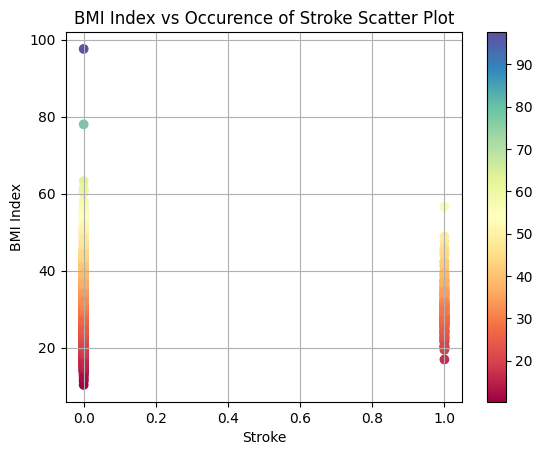

In [ ]:
#a Subset dataset based on BMI & stroke
df_subset = data[['stroke', 'bmi']]; df_subset
# Plot df_subset Data
plt.scatter(x='stroke', y='bmi', data=df_subset, c='bmi', cmap='Spectral')
plt.xlabel('Stroke')
plt.ylabel('BMI Index')
plt.title('BMI Index vs Occurence of Stroke Scatter Plot')
plt.colorbar()
plt.grid()
plt.show()

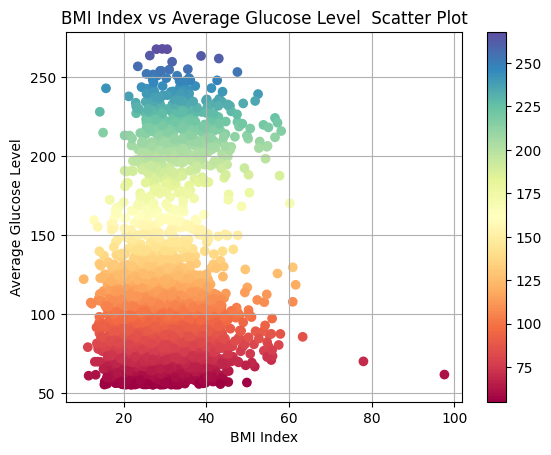

In [ ]:
#b Subset dataset based on BMI & Average Glucose Level
df1_subset = data[['bmi', 'avg_glucose_level']]; df_subset
# Plot df_subset Data
plt.scatter(x='bmi', y='avg_glucose_level', data=df1_subset, c='avg_glucose_level', cmap='Spectral')
plt.xlabel('BMI Index')
plt.ylabel('Average Glucose Level')
plt.title('BMI Index vs Average Glucose Level  Scatter Plot')
plt.colorbar()
plt.grid()
plt.show()

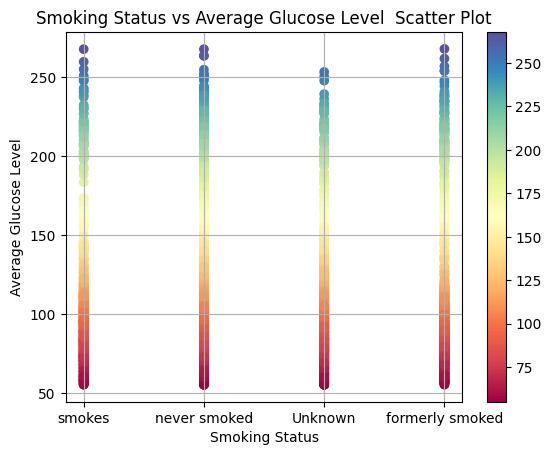

In [ ]:
#c Subset dataset based on Smoking Status & Average Glucose Level
df2_subset = data[['smoking_status', 'avg_glucose_level']]; df_subset
# Plot df_subset Data
plt.scatter(x='smoking_status', y='avg_glucose_level', data=df2_subset, c='avg_glucose_level', cmap='Spectral')
plt.xlabel('Smoking Status')
plt.ylabel('Average Glucose Level')
plt.title('Smoking Status vs Average Glucose Level  Scatter Plot')
plt.colorbar()
plt.grid()
plt.show()

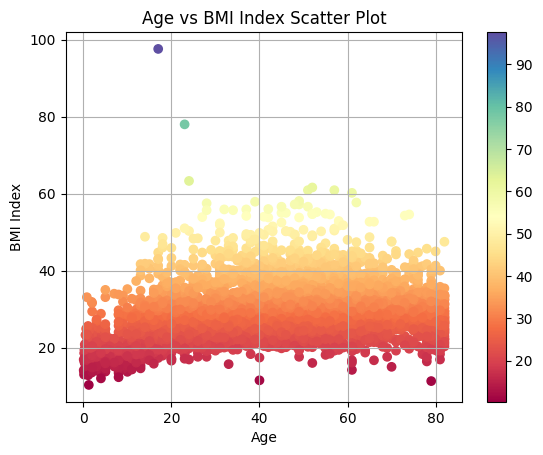

In [ ]:
#d Subset dataset based on Age & BMI Index
df3_subset = data[['age', 'bmi']]; df_subset
# Plot df3_subset Data
plt.scatter(x='age', y='bmi', data=df3_subset, c='bmi', cmap='Spectral')
plt.xlabel('Age')
plt.ylabel('BMI Index')
plt.title('Age vs BMI Index Scatter Plot')
plt.colorbar()
plt.grid()
plt.show()

# **1. Agglomerative Hierarchical Clustering**

**1.1. Create Agglomerative Hierarchical Clusters [N_Clusters = 2 | 3] & Model Evaluation**

In [ ]:
#a
ah_2cluster = agclus(n_clusters=2, affinity='euclidean', linkage='ward')
ah_2cluster_model = ah_2cluster.fit_predict(df_subset); ah_2cluster_model
ah_3cluster = agclus(n_clusters=3, affinity='euclidean', linkage='ward')
ah_3cluster_model = ah_3cluster.fit_predict(df_subset); ah_3cluster_model
#b
ah_2_1cluster = agclus(n_clusters=2, affinity='euclidean', linkage='ward')
ah_2_1cluster_model = ah_2cluster.fit_predict(df1_subset)
ah_3_1cluster = agclus(n_clusters=3, affinity='euclidean', linkage='ward')
ah_3_1cluster_model = ah_3cluster.fit_predict(df1_subset)
#c
#ah_2_2cluster = agclus(n_clusters=2, affinity='euclidean', linkage='ward')
#ah_2_2cluster_model = ah_2cluster.fit_predict(df2_subset)
#ah_3_2cluster = agclus(n_clusters=3, affinity='euclidean', linkage='ward')
#ah_3_2cluster_model = ah_3cluster.fit_predict(df2_subset)
#d
ah_2_3cluster = agclus(n_clusters=2, affinity='euclidean', linkage='ward')
ah_2_3cluster_model = ah_2cluster.fit_predict(df3_subset)
ah_3_3cluster = agclus(n_clusters=3, affinity='euclidean', linkage='ward')
ah_3_3cluster_model = ah_3cluster.fit_predict(df3_subset)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be remo

In [ ]:
#Agglomerative Hierarchical Clustering Model Evaluation [N_Clusters = 2 | 3]
#a
sscore_ah_2cluster = sscore(df_subset, ah_2cluster_model); sscore_ah_2cluster
dbscore_ah_2cluster = dbscore(df_subset, ah_2cluster_model); dbscore_ah_2cluster
sscore_ah_3cluster = sscore(df_subset, ah_3cluster_model); sscore_ah_3cluster
dbscore_ah_3cluster = dbscore(df_subset, ah_3cluster_model); dbscore_ah_3cluster
#b
sscore_ah_2_1cluster = sscore(df1_subset, ah_2_1cluster_model)
dbscore_ah_2_1cluster = dbscore(df1_subset, ah_2_1cluster_model)
sscore_ah_3_1cluster = sscore(df1_subset, ah_3_1cluster_model)
dbscore_ah_3_1cluster = dbscore(df1_subset, ah_3_1cluster_model)
#d
sscore_ah_2_3cluster = sscore(df3_subset, ah_2_3cluster_model)
dbscore_ah_2_3cluster = dbscore(df3_subset, ah_2_3cluster_model)
sscore_ah_3_3cluster = sscore(df3_subset, ah_3_3cluster_model)
dbscore_ah_3_3cluster = dbscore(df3_subset, ah_3_3cluster_model)

*** 1.2. Create a Agglomerative Hierarchical Cluster Member Dataframe***

In [ ]:
# Cluster Model Used : ah_2cluster_model
#a
df_subset_ahcluster = df_subset.copy()
#df_subset_ahcluster.reset_index(level=0, inplace=True, names='car_index')
df_subset_ahcluster['cluster_number'] = ah_2cluster_model
df_subset_ahcluster.sort_values('cluster_number', inplace=True); df_subset_ahcluster
#b
df1_subset_ahcluster = df1_subset.copy()
#df1_subset_ahcluster.reset_index(level=0, inplace=True, names='car_index')
df1_subset_ahcluster['cluster_number'] = ah_2_1cluster_model
df1_subset_ahcluster.sort_values('cluster_number', inplace=True); df1_subset_ahcluster
#d
df3_subset_ahcluster = df3_subset.copy()
#df3_subset_ahcluster.reset_index(level=0, inplace=True, names='car_index')
df3_subset_ahcluster['cluster_number'] = ah_2_3cluster_model
df3_subset_ahcluster.sort_values('cluster_number', inplace=True); df3_subset_ahcluster
df_subset_ahcluster, df1_subset_ahcluster, df3_subset_ahcluster

(      stroke    bmi  cluster_number
 3831     0.0  36.60               0
 1561     1.0  31.00               0
 1560     0.0  34.40               0
 1559     0.0  28.70               0
 3036     0.0  40.12               0
 ...      ...    ...             ...
 1706     0.0  25.50               1
 1707     0.0  23.80               1
 1709     0.0  16.00               1
 1681     0.0  25.20               1
 1915     0.0  20.60               1
 
 [3832 rows x 3 columns],
         bmi  avg_glucose_level  cluster_number
 0     25.40              73.27               0
 2475  16.30              71.63               0
 2476  28.50             112.64               0
 2477  35.00              62.54               0
 2478  25.90              84.31               0
 ...     ...                ...             ...
 313   36.50             196.71               1
 807   40.80             204.77               1
 3258  29.06             253.93               1
 2410  29.80             216.90               1


*** 1.3. Plot Dendrogram of Agglomerative Hierarchical Cluster Data***

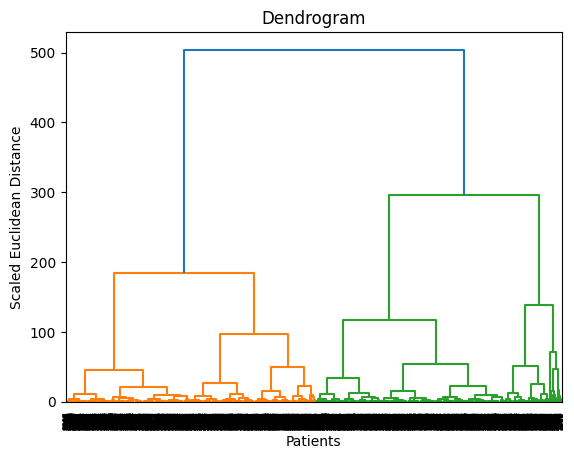

In [ ]:
#Create Agglomerative Linkages
#a
agg_link = sch.linkage(df_subset, method='ward', metric='euclidean')
plt.figure()
dendrogram = sch.dendrogram(agg_link)
plt.xlabel('Patients')
plt.ylabel('Scaled Euclidean Distance')
plt.title('Dendrogram')
plt.show()

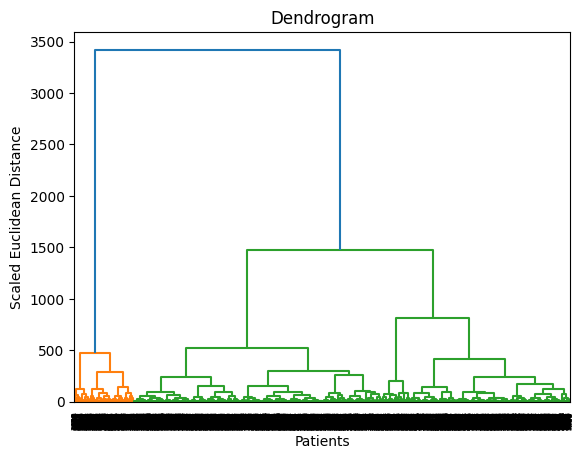

In [ ]:
#b
agg1_link = sch.linkage(df1_subset, method='ward', metric='euclidean')
plt.figure()
dendrogram = sch.dendrogram(agg1_link)
plt.xlabel('Patients')
plt.ylabel('Scaled Euclidean Distance')
plt.title('Dendrogram')
plt.show()

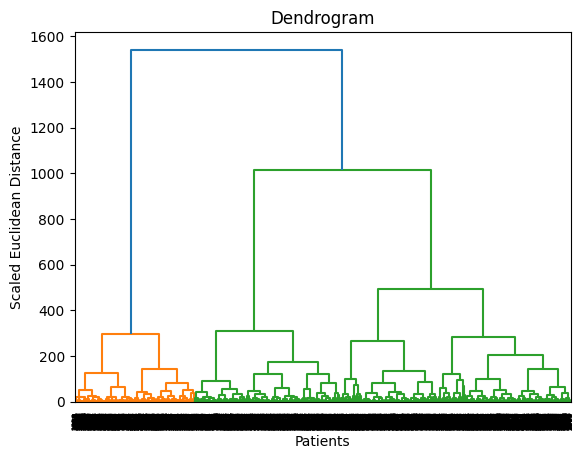

In [ ]:
#d
agg3_link = sch.linkage(df3_subset, method='ward', metric='euclidean')
plt.figure()
dendrogram = sch.dendrogram(agg3_link)
plt.xlabel('Patients')
plt.ylabel('Scaled Euclidean Distance')
plt.title('Dendrogram')
plt.show()

**1.4. Plot the Agglomerative Hierarchical Clustered Data**

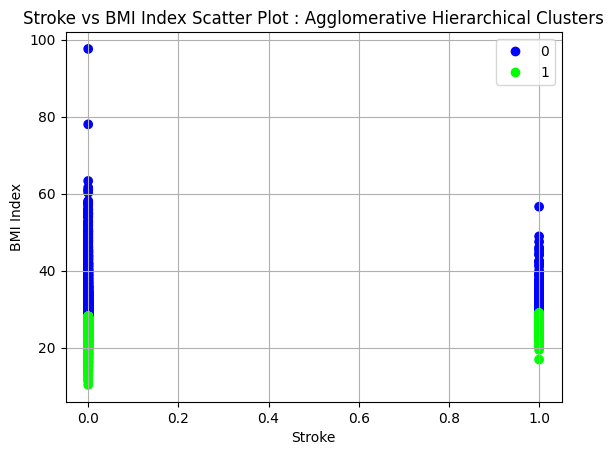

In [ ]:
# Cluster Model Used : ah_2cluster_model
#a
cluster_labels = list(df_subset_ahcluster['cluster_number'].unique())
ah_clusterplot_mpl = plt.scatter(x='stroke', y='bmi', data=df_subset_ahcluster, c='cluster_number', cmap='brg')
plt.legend(handles=ah_clusterplot_mpl.legend_elements()[0], labels=cluster_labels)
plt.xlabel('Stroke')
plt.ylabel('BMI Index')
plt.title('Stroke vs BMI Index Scatter Plot : Agglomerative Hierarchical Clusters')
plt.grid()
plt.show()

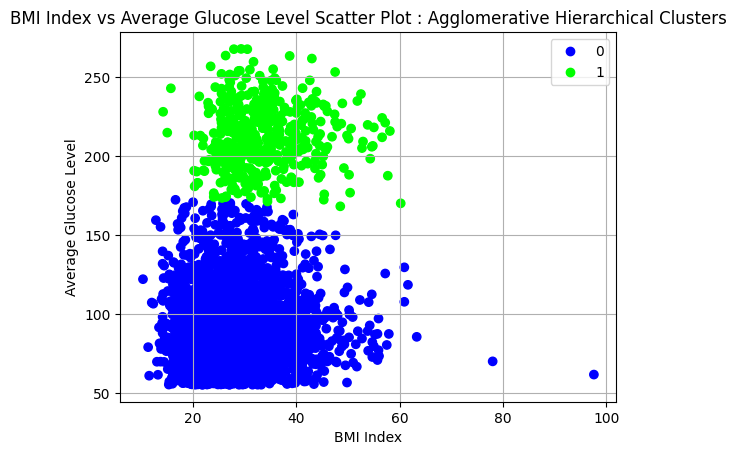

In [ ]:
#b
cluster_labels = list(df1_subset_ahcluster['cluster_number'].unique())
ah_1_clusterplot_mpl = plt.scatter(x='bmi', y='avg_glucose_level', data=df1_subset_ahcluster, c='cluster_number', cmap='brg')
plt.legend(handles=ah_1_clusterplot_mpl.legend_elements()[0], labels=cluster_labels)
plt.xlabel('BMI Index')
plt.ylabel('Average Glucose Level')
plt.title('BMI Index vs Average Glucose Level Scatter Plot : Agglomerative Hierarchical Clusters')
plt.grid()
plt.show()

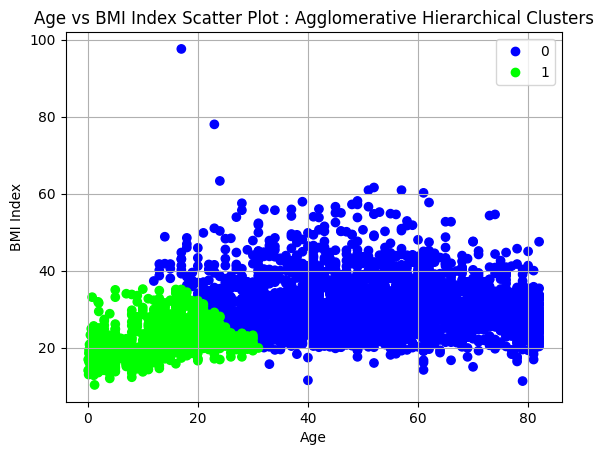

In [ ]:
#d
cluster_labels = list(df3_subset_ahcluster['cluster_number'].unique())
ah_3_clusterplot_mpl = plt.scatter(x='age', y='bmi', data=df3_subset_ahcluster, c='cluster_number', cmap='brg')
plt.legend(handles=ah_3_clusterplot_mpl.legend_elements()[0], labels=cluster_labels)
plt.xlabel('Age')
plt.ylabel('BMI Index')
plt.title('Age vs BMI Index Scatter Plot : Agglomerative Hierarchical Clusters')
plt.grid()
plt.show()

# **2. K-Means Clustering**

*** 2.1. Determine Value of 'K' in K-Means using Elbow Curve & KMeans-Inertia***

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

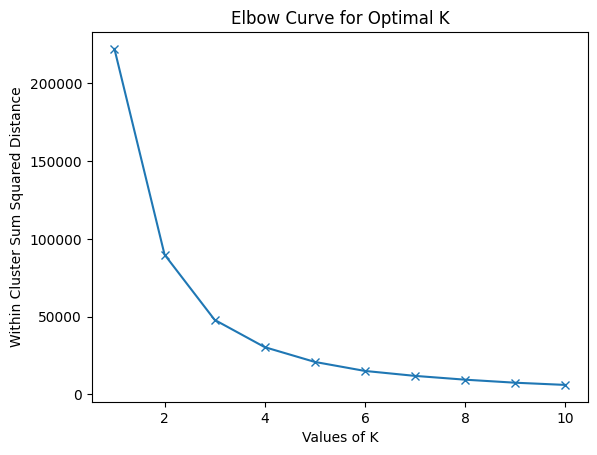

In [ ]:
#a
wcssd = [] # Within-Cluster-Sum-Squared-Distance
nr_clus = range(1,11) # Number of Clusters
for k in nr_clus:
    kmeans = kmclus(n_clusters=k, init='random', random_state=111)
    kmeans.fit(df_subset)
    wcssd.append(kmeans.inertia_)
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Values of K')
plt.ylabel('Within Cluster Sum Squared Distance')
plt.title('Elbow Curve for Optimal K')
plt.show()

**2.2. Create K-Means Clusters [K=2 | K=3] & Model Evaluation**

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

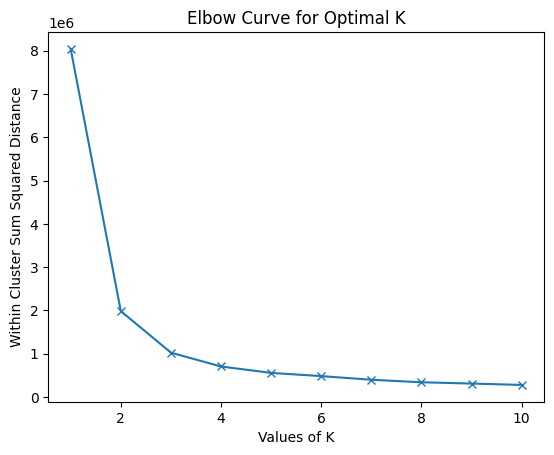

In [ ]:
#b
wcssd = [] # Within-Cluster-Sum-Squared-Distance
nr_clus = range(1,11) # Number of Clusters
for k in nr_clus:
    kmeans = kmclus(n_clusters=k, init='random', random_state=111)
    kmeans.fit(df1_subset)
    wcssd.append(kmeans.inertia_)
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Values of K')
plt.ylabel('Within Cluster Sum Squared Distance')
plt.title('Elbow Curve for Optimal K')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

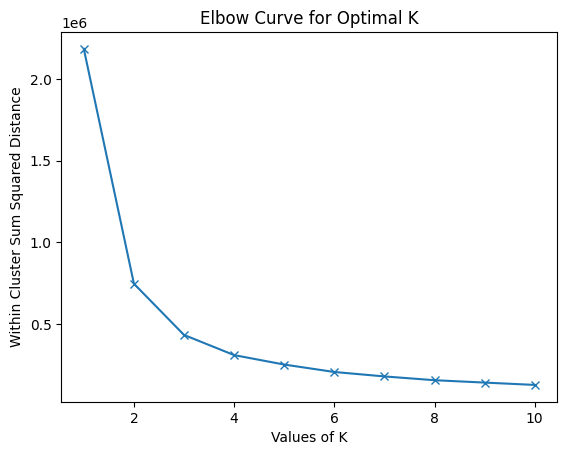

In [ ]:
#d
wcssd = [] # Within-Cluster-Sum-Squared-Distance
nr_clus = range(1,11) # Number of Clusters
for k in nr_clus:
    kmeans = kmclus(n_clusters=k, init='random', random_state=111)
    kmeans.fit(df3_subset)
    wcssd.append(kmeans.inertia_)
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Values of K')
plt.ylabel('Within Cluster Sum Squared Distance')
plt.title('Elbow Curve for Optimal K')
plt.show()

In [ ]:
#a
km_2cluster = kmclus(n_clusters=2, init='random', random_state=222)
km_2cluster_model = km_2cluster.fit_predict(df_subset); km_2cluster_model
km_3cluster = kmclus(n_clusters=3, init='random', random_state=333)
km_3cluster_model = km_3cluster.fit_predict(df_subset); km_3cluster_model
#b
km_2_1cluster = kmclus(n_clusters=2, init='random', random_state=222)
km_2_1cluster_model = km_2cluster.fit_predict(df1_subset)
km_3_1cluster = kmclus(n_clusters=3, init='random', random_state=333)
km_3_1cluster_model = km_3cluster.fit_predict(df1_subset)
#d
km_2_3cluster = kmclus(n_clusters=2, init='random', random_state=222)
km_2_3cluster_model = km_2cluster.fit_predict(df3_subset)
km_3_3cluster = kmclus(n_clusters=3, init='random', random_state=333)
km_3_3cluster_model = km_3cluster.fit_predict(df3_subset)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [ ]:
# Silhouette Score : K=3 Cluster > K=2 Cluster => K=3 is more appropriate
# Davies-Bouldin Score : K=3 Cluster < K=2 Cluster => K=3 is more appropriate
# Appropriate Number of Clusters : 3 (Based on Silhouette Score & Davies-Bouldin Score)
#a
sscore_km_2cluster = sscore(df_subset, km_2cluster_model); sscore_km_2cluster
dbscore_km_2cluster = dbscore(df_subset, km_2cluster_model); dbscore_km_2cluster
sscore_km_3cluster = sscore(df_subset, km_3cluster_model); sscore_km_3cluster
dbscore_km_3cluster = dbscore(df_subset, km_3cluster_model); dbscore_km_3cluster
sscore_km_2cluster,dbscore_km_2cluster,sscore_km_3cluster, dbscore_km_3cluster

(0.5514574314570572,
 0.6361110193200098,
 0.5341291737323631,
 0.5702472834562776)

In [ ]:
#b
sscore_km_2_1cluster = sscore(df1_subset, km_2_1cluster_model)
dbscore_km_2_1cluster = dbscore(df1_subset, km_2_1cluster_model)
sscore_km_3_1cluster = sscore(df1_subset, km_3_1cluster_model)
dbscore_km_3_1cluster = dbscore(df1_subset, km_3_1cluster_model)
sscore_km_2_1cluster,dbscore_km_2_1cluster,sscore_km_3_1cluster, dbscore_km_3_1cluster

(0.7390741443351857,
 0.39250161859490323,
 0.520553473446809,
 0.6050376527024609)

In [ ]:
#d
sscore_km_2_3cluster = sscore(df3_subset, km_2_3cluster_model)
dbscore_km_2_3cluster = dbscore(df3_subset, km_2_3cluster_model)
sscore_km_3_3cluster = sscore(df3_subset, km_3_3cluster_model)
dbscore_km_3_3cluster = dbscore(df3_subset, km_3_3cluster_model)
sscore_km_2_3cluster,dbscore_km_2_3cluster,sscore_km_3_3cluster, dbscore_km_3_3cluster

(0.5396222896081079,
 0.6415451875073406,
 0.4645533495731479,
 0.7244877861647803)

**2.3. Create a KMeans Cluster Member Dataframe**

In [ ]:
#a
df_subset_kmcluster = df_subset.copy()
#df_subset_kmcluster.reset_index(level=0, inplace=True, names='car_index')
df_subset_kmcluster['cluster_number'] = km_3cluster_model
df_subset_kmcluster.sort_values('cluster_number', inplace=True)
#b
df1_subset_kmcluster = df1_subset.copy()
#df1_subset_kmcluster.reset_index(level=0, inplace=True, names='car_index')
df1_subset_kmcluster['cluster_number'] = km_3_1cluster_model
df1_subset_kmcluster.sort_values('cluster_number', inplace=True)
#d
df3_subset_kmcluster = df3_subset.copy()
#df3_subset_kmcluster.reset_index(level=0, inplace=True, names='car_index')
df3_subset_kmcluster['cluster_number'] = km_3_3cluster_model
df3_subset_kmcluster.sort_values('cluster_number', inplace=True)
df_subset_kmcluster, df1_subset_kmcluster, df3_subset_kmcluster

(      stroke   bmi  cluster_number
 3831     0.0  36.6               0
 747      0.0  45.2               0
 3567     0.0  97.6               0
 3566     0.0  38.9               0
 3062     0.0  39.4               0
 ...      ...   ...             ...
 1892     0.0  20.4               2
 1888     0.0  22.6               2
 1885     0.0  16.9               2
 1917     0.0  10.3               2
 1915     0.0  20.6               2
 
 [3832 rows x 3 columns],
        bmi  avg_glucose_level  cluster_number
 1475  23.6             162.30               0
 3189  31.7             137.30               0
 3190  23.4             113.25               0
 3191  31.3              97.90               0
 800   30.7             114.33               0
 ...    ...                ...             ...
 2534  21.9             165.36               2
 1625  25.8             169.97               2
 691   21.0             182.86               2
 1632  22.0             190.89               2
 2133  38.6            

***2.4. Plot the K-Means Clustered Data ***

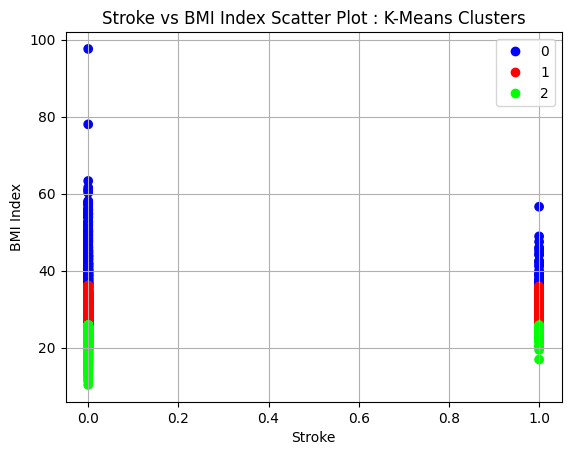

In [ ]:
# Cluster Model Used : km_3cluster_model
#a
cluster_labels = list(df_subset_kmcluster['cluster_number'].unique())
scatter_plot = plt.scatter(x='stroke', y='bmi', data=df_subset_kmcluster, c='cluster_number', cmap='brg')
plt.legend(handles=scatter_plot.legend_elements()[0], labels=cluster_labels)
plt.xlabel('Stroke')
plt.ylabel('BMI Index')
plt.title('Stroke vs BMI Index Scatter Plot : K-Means Clusters')
plt.grid()
plt.show()

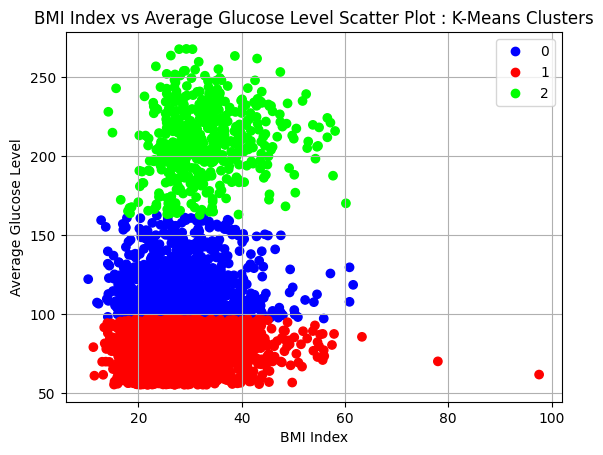

In [ ]:
#b
cluster_labels = list(df1_subset_kmcluster['cluster_number'].unique())
scatter_plot = plt.scatter(x='bmi', y='avg_glucose_level', data=df1_subset_kmcluster, c='cluster_number', cmap='brg')
plt.legend(handles=scatter_plot.legend_elements()[0], labels=cluster_labels)
plt.xlabel('BMI Index')
plt.ylabel('Average Glucose Level')
plt.title('BMI Index vs Average Glucose Level Scatter Plot : K-Means Clusters')
plt.grid()
plt.show()

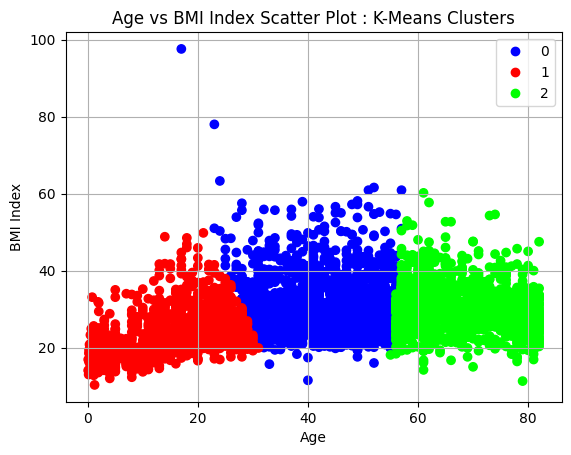

In [ ]:
#d
cluster_labels = list(df3_subset_kmcluster['cluster_number'].unique())
scatter_plot = plt.scatter(x='age', y='bmi', data=df3_subset_kmcluster, c='cluster_number', cmap='brg')
plt.legend(handles=scatter_plot.legend_elements()[0], labels=cluster_labels)
plt.xlabel('Age')
plt.ylabel('BMI Index')
plt.title('Age vs BMI Index Scatter Plot : K-Means Clusters')
plt.grid()
plt.show()

# **REPORT**
**OBJECTIVES**

1.Segment the data based on BMI Index and Stroke.

2.Segment the data based on BMI Index and Average Glucose Level.

3.Segment the data based on Smoking Status and Average Glucose Level.

4.Segment the data based on BMI Index and Age of the individual.

5.Establishing different clusters using various approches to further analyse them.

6.To evaluate cluster model.

7.To identify patterns and realtionships in dataset.


**INSIGHTS**

1.Most of the patients who have suffered a stroke have BMI between 20-50,however there are patients with BMI as high as 80 and 100 who have  not suffered a stroke.

2.Most of the patients are clustered around 20-40 whith glucose level 50 - 150 followed by the patients with glucose level ranging between 200-250.

3.There is no specific relationship identified between glucose level and smoking status of the patients.

4.The highest BMI of the patient was recorded at the age of 20 years.

5.Most of the patients are clustered at 40 years of age and have the BMI around 20-60.

6.The lowest BMI's were recorded for patients whose age is either very youg or very old.

7.The cluster have been established based on three subsets.On the basis of dendo gram analysis it can be said that bMI and stroke have almnost same number of clusters.

8.It also shows that BMI, smoking status have more clusters as compared other feature in subset1, subset2 and sybset3 respectively.

9.On the basis of elboew diagram and its analysis the optimal K for all the subsets is 3 clusters.

10.On the basis agglomorative hiearchal analysis,clusters are as follows:

 Subset-0- 30+ BMI
        1- less than 30 BMI

 subset1-0-less than 150 glucose level
         1- greater than 150 glucose level

 subset3-0-less than 40 BMI and greater than 35 age
         1-greater than 40 BMI and less than 35 age
         
**MANAGERIAL IMPLICATIONS**

1.It will help to identify patterns and relationships in data for further analysis and help know the structre of the data.

2.It will help to analyse data based on different charachterstics and formulate specific strategies for various segments.

3.It will help identify any outlier situation in case of occurance of stroke where sperson can get a stroke even if it was not supposed to based on the data and viceversa.

4.It will help to identify which factors to focus on more to predict or analyse the occurance of a stroke.

5.It will help to arrange the resources needed for treatement of patients based upon the analysis of the data.